In [1]:
import random
import networkx as nx
import numpy as np
import gudhi as gd
import os
from utils import *
from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from gudhi.representations import kernel_methods

In [113]:
G1 = nx.gnm_random_graph(7,10)

for (u,v) in G1.edges():
    G1.edges[u,v]['time'] = random.randint(0,100)

In [114]:
A = nx.adjacency_matrix(G1, weight = 'time')
A.todense()

array([[ 0, 58,  0, 16, 94, 32,  0],
       [58,  0,  0,  0,  0,  0, 32],
       [ 0,  0,  0, 23,  0,  0, 46],
       [16,  0, 23,  0,  0,  0, 93],
       [94,  0,  0,  0,  0, 70,  0],
       [32,  0,  0,  0, 70,  0, 26],
       [ 0, 32, 46, 93,  0, 26,  0]])

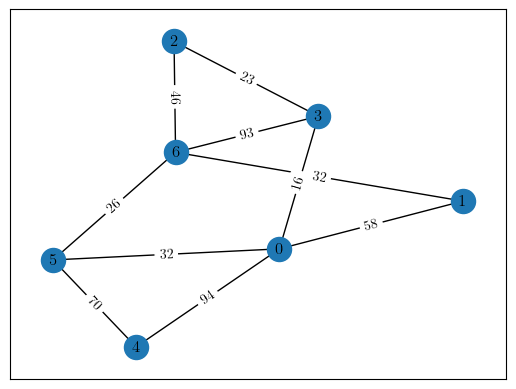

In [116]:
draw_with_labels(G1,'time')

In [118]:
Gw1 = assign_weights(G1)

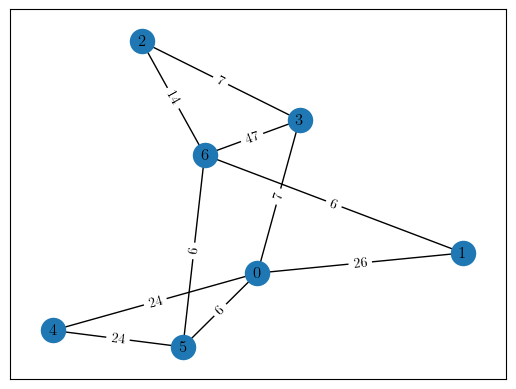

In [119]:
draw_with_labels(Gw1,'weight')

In [120]:
A = nx.adjacency_matrix(Gw1, weight = 'weight')
A.todense()

array([[ 0, 26,  6,  7, 24,  0,  0],
       [26,  0,  0,  0,  0,  6,  0],
       [ 6,  0,  0,  0, 24,  6,  0],
       [ 7,  0,  0,  0,  0, 47,  7],
       [24,  0, 24,  0,  0,  0,  0],
       [ 0,  6,  6, 47,  0,  0, 14],
       [ 0,  0,  0,  7,  0, 14,  0]])

In [122]:
Ad1 = adj_fillinf(Gw1)
Ad1

array([[ 0., 26.,  6.,  7., 24., inf, inf],
       [26.,  0., inf, inf, inf,  6., inf],
       [ 6., inf,  0., inf, 24.,  6., inf],
       [ 7., inf, inf,  0., inf, 47.,  7.],
       [24., inf, 24., inf,  0., inf, inf],
       [inf,  6.,  6., 47., inf,  0., 14.],
       [inf, inf, inf,  7., inf, 14.,  0.]])

In [123]:
X = [Ad1]

# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

diagrams.shape: (1, 8, 3) (8 topological features)


In [124]:
diagrams

array([[[ 0.,  6.,  0.],
        [ 0.,  6.,  0.],
        [ 0.,  6.,  0.],
        [ 0.,  7.,  0.],
        [ 0.,  7.,  0.],
        [ 0., 24.,  0.],
        [26., inf,  1.],
        [14., inf,  1.]]])

In [125]:
plot_diagram(diagrams[0])

In [126]:
PE = PersistenceEntropy()
features = PE.fit_transform(diagrams)
features

array([[ 2.30965146, -1.        ]])

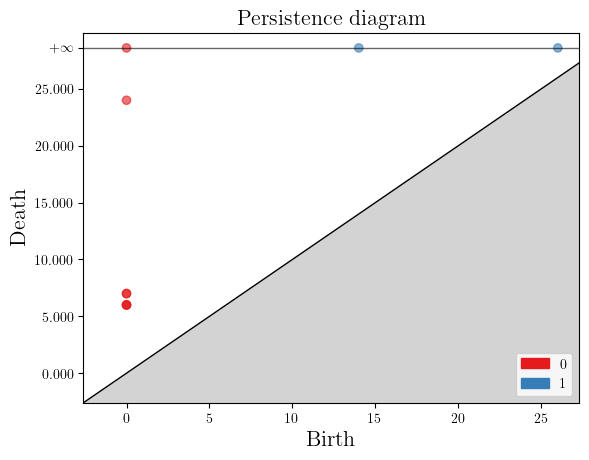

In [127]:
skeleton_protein1 = gd.RipsComplex(
    distance_matrix = Ad1,
    max_edge_length = 100
)

Rips_simplex_tree_protein1 = skeleton_protein1.create_simplex_tree(max_dimension = 3)

BarCodes_Rips1 = Rips_simplex_tree_protein1.persistence()

gd.plot_persistence_diagram(BarCodes_Rips1);

## Using the generated files

In [2]:
save_path = "/Users/rohit/Desktop/CMI/DS/TDA/TTF/data"

X = []

for i in range(10):

    filename = os.path.join(save_path,f"g{i+1}.gml")

    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

In [3]:
# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

diagrams.shape: (10, 10, 3) (10 topological features)


In [5]:
input_diag = []

for diag in diagrams:
    input_diag.append(np.delete(diag,-1,axis=1))
    input_diag[-1][input_diag[-1] == np.inf] = 1000

In [7]:
pssk = kernel_methods.PersistenceScaleSpaceKernel(bandwidth=1)
kernel_matrix = pssk.fit_transform(input_diag)
kernel_matrix

array([[ 6.60898064,  0.99447995,  2.05428968,  2.82638435,  3.36234551,
         0.71816659,  0.54084947,  1.6005164 ,  0.72758574,  2.84524656],
       [ 0.99447995, 13.81298685,  5.99716099,  7.18983812,  7.18540184,
         7.18982922,  9.87810272,  7.39772791,  7.23495201,  7.50611136],
       [ 2.05428968,  5.99716099, 13.20299168,  8.19534168,  6.44285199,
        10.20941944,  5.29531114,  7.83997487,  8.66936359,  6.09232596],
       [ 2.82638435,  7.18983812,  8.19534168, 14.13727084, 13.73991613,
        10.2085032 ,  8.30346059,  9.61128508,  9.20375122, 10.37533377],
       [ 3.36234551,  7.18540184,  6.44285199, 13.73991613, 16.06874376,
         9.53521814,  7.52263574,  8.49991011,  8.72385457, 10.26924395],
       [ 0.71816659,  7.18982922, 10.20941944, 10.2085032 ,  9.53521814,
        12.86900008,  7.98784912,  9.32007173,  9.76301962,  8.94731704],
       [ 0.54084947,  9.87810272,  5.29531114,  8.30346059,  7.52263574,
         7.98784912, 11.78582537,  8.15838571

In [3]:
# Getting similar graphs to g1.gml
save_path = "/Users/rohit/Desktop/CMI/DS/TDA/TTF/data"

G1 = nx.read_gml(os.path.join(save_path,f"g{1}.gml"))

In [43]:
G1.edges()

from random import sample

def slight_change(G):
    Ge = G.copy()
    random_edge = sample(list(G.edges()),1)
    # print(random_edge[0])
    random_ptb = sample(list(range(1,5)),1)
    # print(random_ptb[0])
    random_sign = sample([0,1],1)
    # print(random_sign[0])
    if random_sign[0] == 0:
        Ge.edges[random_edge[0][0],random_edge[0][1]]['time'] = Ge.edges[random_edge[0][0],random_edge[0][1]]['time'] - random_ptb[0]
    elif random_sign[0] == 1:
        Ge.edges[random_edge[0][0],random_edge[0][1]]['time'] = Ge.edges[random_edge[0][0],random_edge[0][1]]['time'] + random_ptb[0]
    return Ge



In [44]:
for i in range(10):
    G = nx.read_gml(os.path.join(save_path,f"g{i+1}.gml"))
    for j in range(10):
        Ge = slight_change(G)
        filepath = os.path.join(save_path,f"g{i+1}e{j+1}.gml")
        nx.write_gml(Ge,filepath)

## Getting the kernel matrix

In [4]:
X = []
for i in range(10):
    filename = os.path.join(save_path,f"g{1}e{i+1}.gml")

    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

for i in range(10):
    filename = os.path.join(save_path,f"g{2}e{i+1}.gml")
    
    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

for i in range(2):
    filename = os.path.join(save_path,f"g{i+1}.gml")
    
    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

In [5]:
# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

diagrams.shape: (22, 10, 3) (10 topological features)


In [6]:
input_diag = []

for diag in diagrams:
    input_diag.append(np.delete(diag,-1,axis=1))
    input_diag[-1][input_diag[-1] == np.inf] = 1000

In [7]:
pssk = kernel_methods.PersistenceScaleSpaceKernel(bandwidth=1)
kernel_matrix = pssk.fit_transform(input_diag)
kernel_matrix

array([[6.60898064e+00, 5.49636362e+00, 5.31830159e+00, 4.48474500e+00,
        6.05749865e+00, 5.94521871e+00, 5.81122693e+00, 4.61869748e+00,
        5.49662830e+00, 6.21004133e+00, 9.94479935e-01, 2.42554981e-01,
        2.42554981e-01, 9.94479935e-01, 2.42554981e-01, 9.98913277e-01,
        1.19271643e+00, 4.43184842e-02, 1.96236283e+00, 2.57305698e+00,
        6.21447021e+00, 9.94479935e-01],
       [5.49636362e+00, 6.64336478e+00, 4.78817476e+00, 4.38426793e+00,
        5.84131493e+00, 5.41509188e+00, 5.28110010e+00, 4.07137857e+00,
        6.22227392e+00, 5.44237415e+00, 2.16772794e-01, 1.85303994e-02,
        1.85303994e-02, 2.16772794e-01, 1.85303994e-02, 2.21204649e-01,
        2.33964891e-01, 1.33830240e-03, 1.82973399e+00, 1.18465569e+00,
        5.68434338e+00, 2.16772794e-01],
       [5.31830159e+00, 4.78817476e+00, 7.10177984e+00, 3.74112056e+00,
        5.55584047e+00, 5.15273400e+00, 5.06317064e+00, 4.11703929e+00,
        5.20123611e+00, 5.31400655e+00, 9.94479954e-01

## Generating the Dataset

In [3]:
from random import sample

# Function to change graph for different classes. 5% edges are perturbed in the big change

def big_change(G,m):
    num_ch_edges = m//20
    Ge = G.copy()
    random_edge = sample(list(G.edges()),num_ch_edges)
    # print(random_edge[0])
    random_ptb = sample(list(range(1,5)),1)
    # print(random_ptb[0])
    random_sign = sample([0,1],1)
    # print(random_sign[0])
    for edge in random_edge:
        if random_sign[0] == 0:
            Ge.edges[edge[0],edge[1]]['time'] = Ge.edges[edge[0],edge[1]]['time'] - random_ptb[0]
        elif random_sign[0] == 1:
            Ge.edges[edge[0],edge[1]]['time'] = Ge.edges[edge[0],edge[1]]['time'] + random_ptb[0]
    return Ge

# Function to change the graph for the same class. 1% pertrubation

def slight_change(G,m):
    num_ch_edges = m//100
    Ge = G.copy()
    random_edge = sample(list(G.edges()),num_ch_edges)
    # print(random_edge[0])
    random_ptb = sample(list(range(1,5)),1)
    # print(random_ptb[0])
    random_sign = sample([0,1],1)
    # print(random_sign[0])
    for edge in random_edge:
        if random_sign[0] == 0:
            Ge.edges[edge[0],edge[1]]['time'] = Ge.edges[edge[0],edge[1]]['time'] - random_ptb[0]
        elif random_sign[0] == 1:
            Ge.edges[edge[0],edge[1]]['time'] = Ge.edges[edge[0],edge[1]]['time'] + random_ptb[0]
    return Ge

In [4]:
G0 = nx.gnm_random_graph(50,100)
for (u,v) in G0.edges():
    G0.edges[u,v]['time'] = random.randint(0,100)

In [5]:
G1 = big_change(G0,100)
G2 = big_change(G0,100)
G3 = big_change(G0,100)
G4 = big_change(G0,100)
G5 = big_change(G0,100)

In [6]:
l1 = [G1]
for i in range(99):
    T =  slight_change(G1,100)
    l1 += [T]

l2 = [G2]
for i in range(99):
    T =  slight_change(G2,100)
    l2 += [T]

l3 = [G3]
for i in range(99):
    T =  slight_change(G3,100)
    l3 += [T]

l4 = [G4]
for i in range(99):
    T =  slight_change(G4,100)
    l4 += [T]

l5 = [G5]
for i in range(99):
    T =  slight_change(G5,100)
    l5 += [T]

In [7]:
L = l1+l2+l3+l4+l5

In [8]:
label = [1 for i in range(100)] + [2 for i in range(100)] + [3 for i in range(100)] + [4 for i in range(100)] + [5 for i in range(100)]

## Training the SVM

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [21]:
Lw = []
for i in L:
    Lw += [assign_weights(i)]

Lwe = []
for i in Lw:
    Lwe += [adj_fillinf(i)]

VR = VietorisRipsPersistence(metric="precomputed")
diagrams_trail = VR.fit_transform(Lwe)

input_diag_trial = []

for diag in diagrams_trail:
    input_diag_trial.append(np.delete(diag,-1,axis=1))

for i in range(500):
    input_diag_trial[i][input_diag_trial[i] == np.inf] = 10000

In [22]:
X_train, X_test, y_train, y_test = train_test_split(input_diag_trial, label, test_size=0.2, random_state=42)

In [23]:
X_combined = X_train + X_test

pssk = kernel_methods.PersistenceWeightedGaussianKernel(bandwidth=1)

# Compute the kernel matrix for the combined data
gram_matrix_combined = pssk.fit_transform(X_combined)

In [24]:
# Normalizing the matrix

# norm = np.linalg.norm(gram_matrix_combined.flatten())
# gram_matrix_combined = gram_matrix_combined / norm

# Split the kernel matrix into train and test parts
num_train = len(X_train)
gram_matrix_train = gram_matrix_combined[:num_train, :num_train]
gram_matrix_test = gram_matrix_combined[num_train:, :num_train]

In [25]:
gram_matrix_train

array([[428.52325662, 427.73804745, 416.05429424, ..., 431.85805962,
        429.234636  , 421.5943266 ],
       [427.73804745, 438.55438327, 422.49097606, ..., 435.7707888 ,
        435.82476082, 429.73504244],
       [416.05429424, 422.49097606, 424.08640603, ..., 422.28653458,
        428.3114142 , 417.90188791],
       ...,
       [431.85805962, 435.7707888 , 422.28653458, ..., 439.44165731,
        436.42275202, 428.77382899],
       [429.234636  , 435.82476082, 428.3114142 , ..., 436.42275202,
        442.95947057, 429.42194573],
       [421.5943266 , 429.73504244, 417.90188791, ..., 428.77382899,
        429.42194573, 426.20316195]])

In [26]:
gram_matrix_test

array([[432.4092113 , 438.49131111, 426.74425191, ..., 440.73393289,
        438.79012885, 432.06630735],
       [418.90602194, 428.23351978, 423.51777388, ..., 426.39521089,
        428.81911634, 422.40033544],
       [430.63541076, 435.64088139, 422.74187358, ..., 438.49321386,
        437.00638764, 429.67666568],
       ...,
       [416.8712779 , 427.23650256, 421.48546225, ..., 424.7940124 ,
        428.54453707, 421.73485835],
       [428.49046762, 437.07360451, 423.63286752, ..., 435.73498431,
        437.27001392, 429.1499911 ],
       [422.58299901, 429.57622147, 426.75195526, ..., 428.86567836,
        431.20274574, 425.1147256 ]])

In [27]:
# Using SVM

svm_classifier = SVC(kernel='precomputed')
svm_classifier.fit(gram_matrix_train, y_train)

y_pred = svm_classifier.predict(gram_matrix_test)

accuracy = svm_classifier.score(gram_matrix_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test,y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [20]:
# Using logistic regression

from sklearn.linear_model import LogisticRegression

klr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
klr.kernel = 'precomputed'

klr.fit(gram_matrix_train,y_train)

y_pred = klr.predict(gram_matrix_test)

accuracy = klr.score(gram_matrix_test, y_test)
print("Accuracy = ", accuracy)

print(classification_report(y_test,y_pred))

Accuracy =  0.1
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        14
           3       0.10      1.00      0.18        10
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        24

    accuracy                           0.10       100
   macro avg       0.02      0.20      0.04       100
weighted avg       0.01      0.10      0.02       100



/home/rohit/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohit/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohit/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
graphs = []

for i in range(10):
    filename = os.path.join(save_path,f"g{1}e{i+1}.gml")

    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

for i in range(10):
    filename = os.path.join(save_path,f"g{2}e{i+1}.gml")
    
    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

for i in range(2):
    filename = os.path.join(save_path,f"g{i+1}.gml")
    
    G = nx.read_gml(filename)

    Gw = assign_weights(G)

    Aw = adj_fillinf(Gw)

    X.append(Aw)

NameError: name 'os' is not defined

In [49]:
# Changing something here for git